# Atividade 1

Escolher uma aplicação / problema prático e implementar, em planilha eletrônica ou outro software, usando um dos métodos a seguir: Euler Melhorado, Euler Modificado, Runge-Kutta de 3ª Ordem ou Runge-Kutta de 4ª Ordem.


Fazer o envio via formulário do Google Forms, descrevendo o problema abordado e anexando a planilha eletrônica /código construída(o), bem como os resultados obtidos.

Resultados salvos em 'lorenz_results.xlsx'


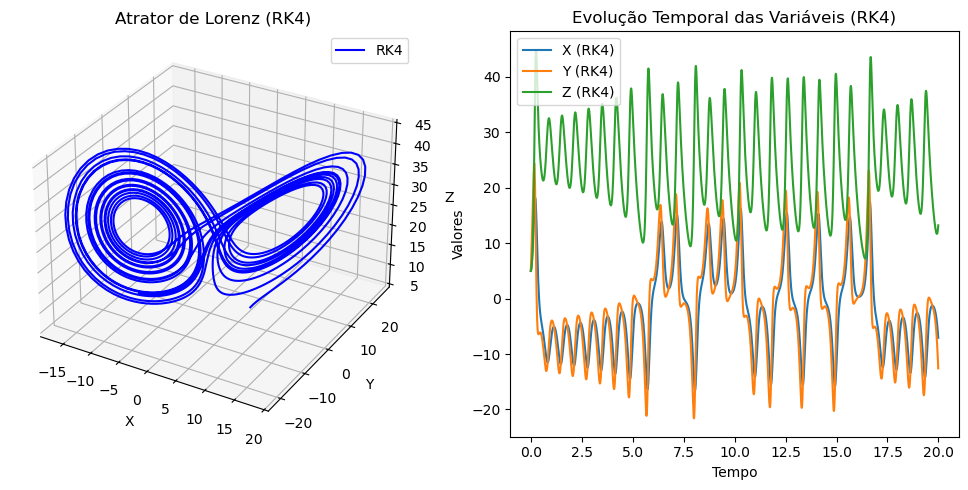

In [2]:
# Importando os pacotes:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parâmetros do Sistema de Lorenz:
sigma = 10
rho = 28
beta = 8 / 3

# Sistema de Lorenz:
def lorenz(x, y, z):
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z
    return np.array([dx, dy, dz])

# Método Runge Kutta:
def runge_kutta4(f, y0, t0, tf, h):
    t = np.arange(t0, tf, h)
    y = np.zeros((len(t), len(y0)))
    y[0] = y0
    for i in range(len(t) - 1):
        k1 = f(*y[i])
        k2 = f(*(y[i] + (h / 2) * k1))
        k3 = f(*(y[i] + (h / 2) * k2))
        k4 = f(*(y[i] + h * k3))
        y[i+1] = y[i] + (h / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
    return t, y

# Configuração inicial e parâmetros
y0 = np.array([5.0, 5.0, 5.0])
t0, tf, h = 0, 20, 0.01  # Intervalo de tempo e passo

t_rk4, y_rk4 = runge_kutta4(lorenz, y0, t0, tf, h)

df = pd.DataFrame({
    "Tempo": t_rk4,
    "RK4 X": y_rk4[:, 0],
    "RK4 Y": y_rk4[:, 1],
    "RK4 Z": y_rk4[:, 2],
})

# Salva Resultados no Excel:
df.to_excel("lorenz_results.xlsx", index=False)

print("Resultados salvos em 'lorenz_results.xlsx'")

# Gráficos:
fig = plt.figure(figsize=(10, 5))

# Gráfico 3D
ax = fig.add_subplot(121, projection='3d')
ax.plot(y_rk4[:, 0], y_rk4[:, 1], y_rk4[:, 2], label="RK4", color="blue")
ax.set_title("Atrator de Lorenz (RK4)")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend()

# Gráfico 2D X vs Z
ax2 = fig.add_subplot(122)
ax2.plot(t_rk4, y_rk4[:, 0], label="X (RK4)")
ax2.plot(t_rk4, y_rk4[:, 1], label="Y (RK4)")
ax2.plot(t_rk4, y_rk4[:, 2], label="Z (RK4)")
ax2.set_title("Evolução Temporal das Variáveis (RK4)")
ax2.set_xlabel("Tempo")
ax2.set_ylabel("Valores")
ax2.legend()

plt.tight_layout()
plt.show()